# Sentiment Analysis

After thorough preprocessing and cleaning, our dataset is now primed for a detailed sentiment analysis. This analysis focuses on user comments extracted from the subreddit `r/ETFs`, specifically those that mention the Vanguard S&P 500 ETF, commonly referred to as `VOO`. 

In this section, we aim to assess the prevailing sentiments within the community discussions about VOO. Understanding these sentiments can provide insights into general investor attitudes and potential market trends related to this ETF. We'll employ various sentiment analysis techniques to quantify how positive, neutral, or negative each comment is.

This process not only helps in gauging the overall market sentiment towards VOO but also aids in predicting investor behavior and potential movements in ETF performance based on public perception.

---

## Import the datasets

In [242]:
import pandas as pd

df = pd.read_csv('../datasets/cleaned_cmts_voo.csv')
df.head()

,date,body
0,2024-03-27,Just buy VOO at this point
1,2024-03-27,Voo & schg have 53% overlap. Past results don’...
2,2024-03-27,Schd + Schg makes up the majority of voo. Just...
3,2024-03-27,13% overlap with VOO and less than 1% overlap ...
4,2024-03-28,"30% VOO, 30% QQQ, 10% VYM, 10% BND, 10% Mixed ..."


---

## Using Transformer Model in Sentiment Analysis

In this section, we leverage the powerful FinBERT model, a transformer-based model fine-tuned for financial sentiment analysis. Hosted on Hugging Face at [yiyanghkust/finbert-tone](https://huggingface.co/yiyanghkust/finbert-tone), FinBERT is an adaptation of the widely-acclaimed BERT architecture, tailored to understand the nuances of financial discourse.

### Example

We utilize the `pipeline` function from the `transformers` library to instantiate a sentiment analysis pipeline with the FinBERT model (`yiyanghkust/finbert-tone`). This model is adept at discerning sentiment in financial texts, categorizing them into distinct classes:

- **Positive**: Represented by label `2`.
- **Neutral**: Represented by label `1`.
- **Negative**: Represented by label `0`.

Each text is processed through the `classify_sentiment` function, which utilizes the FinBERT model to predict the sentiment label and a corresponding confidence score. The sentiment score provides a nuanced understanding of sentiment intensity

1. **Positive Sentence**: "Stock price will increase." - Expected to return a sentiment label indicating a positive sentiment.
2. **Neutral Sentence**: "VOO is Vanguard S&P 500 ETF." - Expected to be classified as neutral as it merely states a fact.
3. **Negative Sentence**: "Stock price will decrease." - Expected to express a negative sentiment.

Here's how we execute this analysis:

In [243]:
from transformers import pipeline

model_name = "yiyanghkust/finbert-tone"
sentiment_pipeline = pipeline("sentiment-analysis", model=model_name)

# Function to classify sentiment of a single text
def classify_sentiment(text):
    result = sentiment_pipeline(text)[0]
    # Update the sentiment label mapping based on the actual output of your model
    sentiment_labels = {'Positive': 2, 'Neutral': 1, 'Negative': 0}
    label = sentiment_labels.get(result['label'], -1)  # Default to -1 if label not found
    score = result['score']
    return label, score

pos_text = "Stock price will increase."
neu_text = "VOO is Vanguard S&P 500 ETF."
neg_text = "Stock price will decrease."

pos_label, pos_score = classify_sentiment(pos_text)
neu_label, neu_score = classify_sentiment(neu_text)
neg_label, neg_score = classify_sentiment(neg_text)

header = f"{'Sentence Type':<20} {'Sentiment Label':<20} {'SentimentScore':<10}"
print(header)
print("-" * len(header))  # Prints a separator line
print(f"{'Positive sentence:':<20} {pos_label:<20} {pos_score:<10f}")
print(f"{'Neutral sentence:':<20} {neu_label:<20} {neu_score:<10f}")
print(f"{'Negative sentence:':<20} {neg_label:<20} {neg_score:<10f}")

Sentence Type        Sentiment Label      SentimentScore
--------------------------------------------------------
Positive sentence:   2                    0.956162  
Neutral sentence:    1                    0.999998  
Negative sentence:   0                    0.969693  


### Classifying Sentiments in Reddit Comments

In this section, we apply the sentiment analysis pipeline using the FinBERT model to classify the sentiment of comments related to the ETF `VOO` from Reddit. The FinBERT model, being specialized for financial contexts, provides us with insights into the public sentiment expressed in these comments.

#### Implementation

Given the limitations of the model to handle lengthy texts, we truncate comments to the first 512 characters. This ensures that the model operates within its design specifications without compromising the input's integrity.

Here's how we execute the sentiment classification on our dataset:

In [244]:
from transformers import pipeline

model_name = "yiyanghkust/finbert-tone"
sentiment_pipeline = pipeline("sentiment-analysis", model=model_name)

In [245]:
# Function to classify sentiment of a single text
def classify_sentiment(text):
    result = sentiment_pipeline(text)[0]
    # Update the sentiment label mapping based on the actual output of your model
    sentiment_labels = {'Positive': 2, 'Neutral': 1, 'Negative': 0}
    label = sentiment_labels.get(result['label'], -1)  # Default to -1 if label not found
    score = result['score']
    return label, score

# Apply the sentiment analysis to each comment
sentiment_results = df['body'].apply(lambda x: classify_sentiment(x[:512]))  # Limiting character count to 512

# Create new columns for sentiment label and sentiment score
df['sentiment_label'], df['sentiment_score'] = zip(*sentiment_results)

# Check the DataFrame
df.head()

### Checking for Missing Values

Before proceeding with further data analysis or visualization, it's crucial to ensure that the dataset is complete and does not contain any missing values that could skew the results or lead to errors during computational processes.

In [ ]:
df.isnull().sum()

date               0
body               0
sentiment_label    0
sentiment_score    0
dtype: int64

---

## Visualizing the Data

### 1. Time Series of Sentiment Counts
- **What it shows**: This bar chart displays the comparison of the count of positive, neutral, and negative comments over time.
- **Interpretation**: 
  - The height of the bars represents the count of sentiments (positive, neutral, or negative) on each date.
  - Higher bars for a sentiment type on a specific date indicate more comments with that sentiment.
  - Comparing the heights of the bars for each sentiment type on each date provides a visual representation of the predominant sentiment on that day.

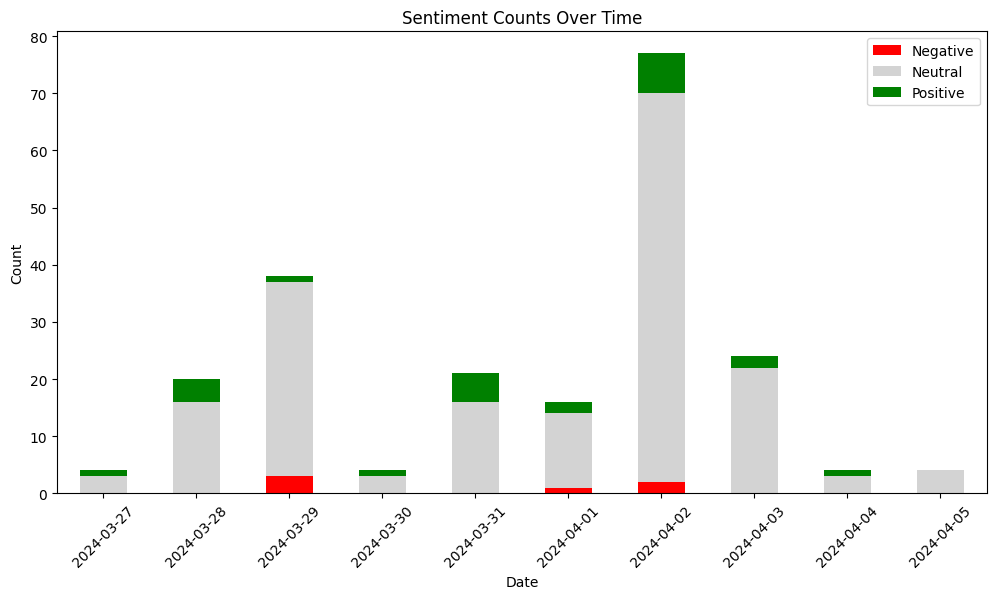

In [ ]:
import matplotlib.pyplot as plt

# Group by date and sentiment_label, then count occurrences
grouped = df.groupby(['date', 'sentiment_label']).size().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'lightgray', 'green'])
plt.title('Sentiment Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(['Negative', 'Neutral', 'Positive'])
plt.xticks(rotation=45)
plt.show()

### Insights from Sentiment Counts Over Time Graph

The graph shows the distribution of sentiments in comments over time, highlighting several key points:

- **Neutral Dominance**: A large number of comments are neutral, suggesting a focus on information sharing.

- **Occasional Positivity**: Peaks in positive sentiment may relate to favorable events or news.

- **Sparse Negativity**: Negative sentiments are few, indicating less adverse sentiment towards `VOO`.

- **Engagement Fluctuations**: The bar heights vary, indicating shifts in community interaction levels, possibly driven by market events.

- **Important Dates to Note**: Dates with high sentiment extremes could align with significant market events and may need further examination.


---

### 2. Heatmap for Sentiment Analysis
#### Heatmap for Sentiment Count
- **What it shows**: This heatmap visualizes the frequency of comments classified as positive, neutral, or negative for each date.
- **Interpretation**:
  - The heatmap's cells represent the number of comments for each sentiment category on specific dates.
  - The intensity of the red color reflects the volume of comments - more intensely red colors indicate a higher number of comments, while cooler blue shades suggest fewer comments.

#### Heatmap for Average Sentiment Intensity
- **What it shows**: It indicates the average sentiment score for comments, reflecting the intensity of sentiment on each date.
- **Interpretation**:
  - Each cell displays the average sentiment score for a given date.
  - The intensity of the color represents the average sentiment strength, with darker colors signifying stronger sentiments.

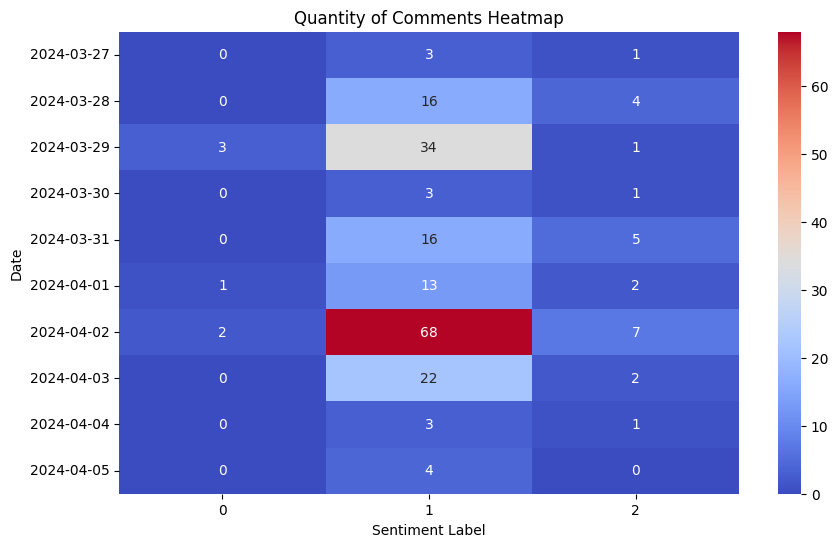

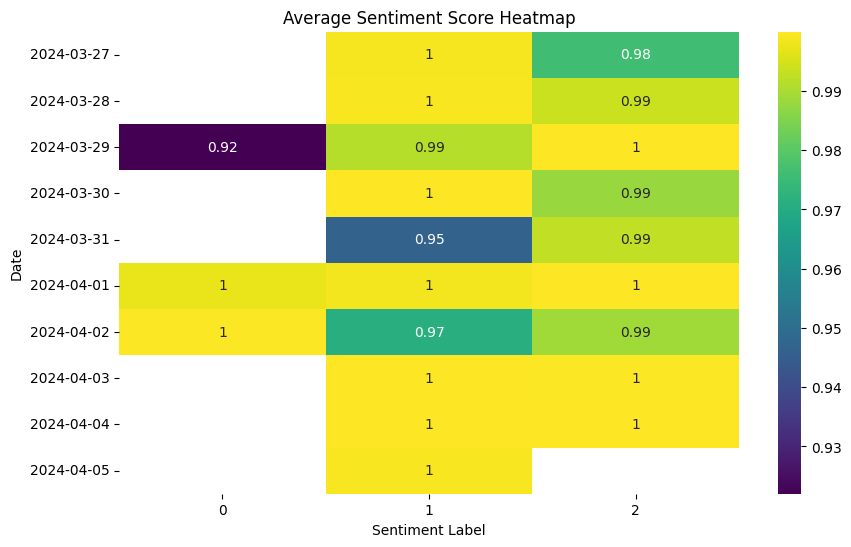

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'date': df['date'],
    'sentiment_label': df['sentiment_label'],
    'sentiment_score': df['sentiment_score']
}

visualization_df = pd.DataFrame(data)

# Heatmap 1: Quantity of Comments
# Counting comments
count_df = visualization_df.groupby(['date', 'sentiment_label']).size().unstack(fill_value=0)

# Plotting heatmap for quantity
plt.figure(figsize=(10, 6))
sns.heatmap(count_df, annot=True, cmap='coolwarm')
plt.title('Quantity of Comments Heatmap')
plt.xlabel('Sentiment Label')
plt.ylabel('Date')
plt.show()

# Heatmap 2: Average Sentiment Score
# Calculating average sentiment score
# Group by 'date' and 'sentiment_label' and compute average sentiment score
grouped = visualization_df.groupby(['date', 'sentiment_label']).mean().reset_index()

# Pivot the table
pivot_df = grouped.pivot(index='date', columns='sentiment_label', values='sentiment_score')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap='viridis')
plt.title('Average Sentiment Score Heatmap')
plt.xlabel('Sentiment Label')
plt.ylabel('Date')
plt.show()


### Insights from the Heatmaps

#### Quantity of Comments Heatmap
The 'Quantity of Comments Heatmap' provides a quick visual understanding of the volume of comments over time, categorized by sentiment:

- **Diverse Sentiment Expression**: The heatmap indicates varied sentiment expression across different dates, with a mix of neutral, positive, and occasionally negative comments.
- **Dominant Days**: Certain days show a higher overall number of comments, hinting at increased user activity which could be aligned with market movements or news events.
- **Neutral Commentary**: A consistent presence of neutral comments suggests a steady stream of informational content without strong sentiment bias.

#### Average Sentiment Score Heatmap
The 'Average Sentiment Score Heatmap' offers insights into the intensity of expressed sentiments:

- **Consistent Sentiment Intensity**: There's a general trend of high sentiment scores across the dates, regardless of the sentiment category, indicating strong opinions are being expressed.
- **Neutral Scores**: Neutral comments tend to have slightly lower scores, possibly reflecting a lack of strong sentiment either way.
- **Missing Values Explained**: Not all dates have values for each sentiment label. This absence of data points could be due to several reasons: 
    - less overall activity on the subreddit
    - no events triggering that sentiment
    - lack of engagement from users in expressing that sentiment


---

### 3. Stacked Bar Chart with Sentiment Scores
- **What it shows**: Displays the number of comments broken down by sentiment score ranges, showing the strength of sentiments.
- **Interpretation**: 
    - **Positive Sentiment Score**: Larger segments in the higher score ranges indicate days when positive sentiments were particularly intense, signifying stronger optimism among commenters.
    - **Neutral Sentiment Score**: Larger segments suggest a higher consensus among commenters in their neutral stance.
    - **Negative Sentiment Score**: Larger segments in the lower score bins suggest days marked by more intense negative sentiment, potentially reflecting widespread concerns or adverse reactions to events.

C:\Users\User\AppData\Local\Temp\ipykernel_11600\3641689167.py:22: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



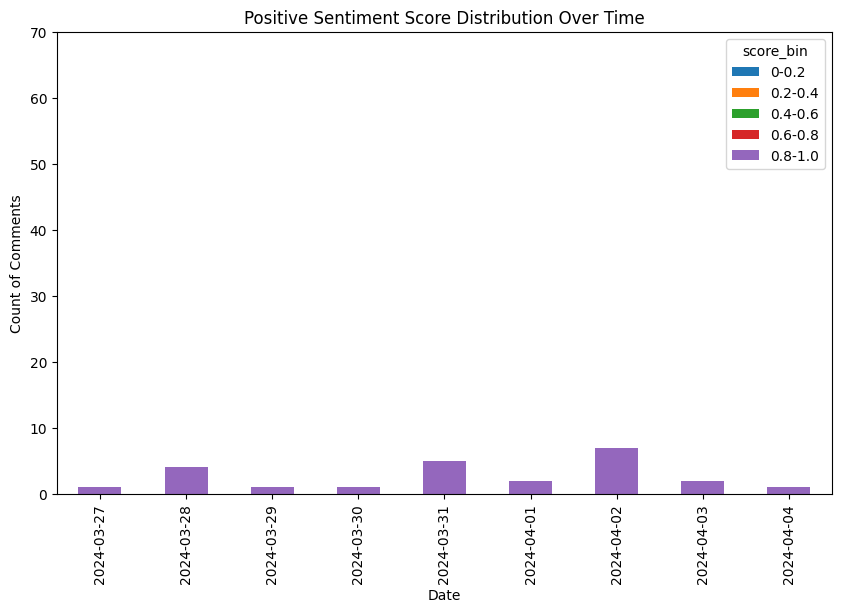

C:\Users\User\AppData\Local\Temp\ipykernel_11600\3641689167.py:31: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



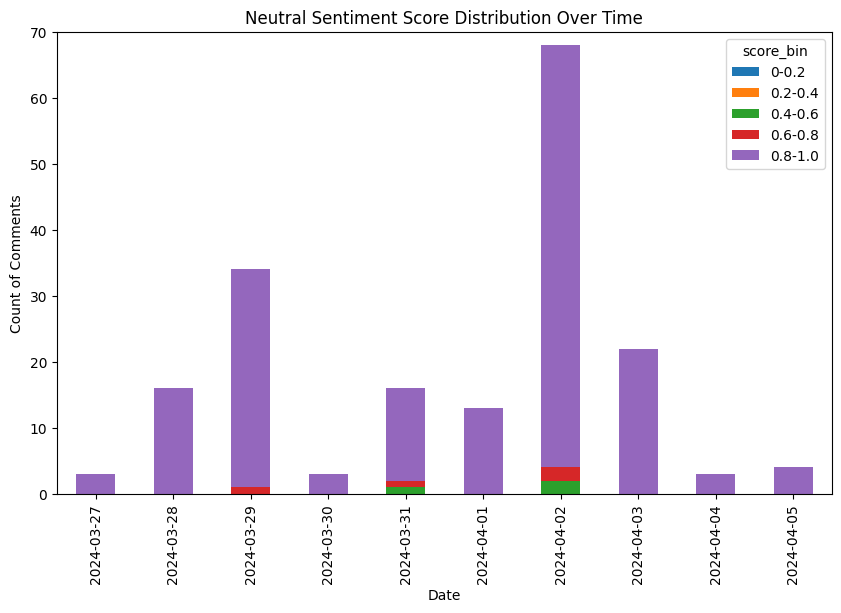

C:\Users\User\AppData\Local\Temp\ipykernel_11600\3641689167.py:40: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



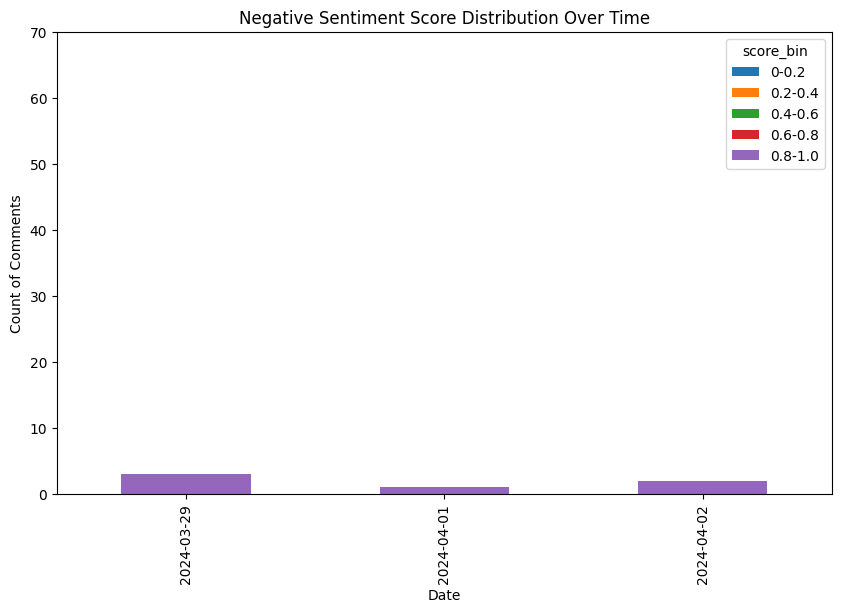

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'date': df['date'],
    'sentiment_score': df['sentiment_score'],
    'sentiment_label': df['sentiment_label']
}
visualization_df = pd.DataFrame(data)

# Bin the sentiment scores
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
visualization_df['score_bin'] = pd.cut(visualization_df['sentiment_score'], bins=bins, labels=labels)

# Separate Positive, Neutral and Negative DataFrames
positive_df = visualization_df[visualization_df['sentiment_label'] == 2]
neutral_df = visualization_df[visualization_df['sentiment_label'] == 1]
negative_df = visualization_df[visualization_df['sentiment_label'] == 0]

# Plotting Stacked Bar Chart for Positive Sentiments
pivot_positive = positive_df.groupby(['date', 'score_bin']).size().unstack(fill_value=0)
pivot_positive.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Positive Sentiment Score Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Comments')
plt.ylim(0, 70)
plt.show()

# Plotting Stacked Bar Chart for Neutral Sentiments
pivot_neutral = neutral_df.groupby(['date', 'score_bin']).size().unstack(fill_value=0)
pivot_neutral.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Neutral Sentiment Score Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Comments')
plt.ylim(0, 70)
plt.show()

# Plotting Stacked Bar Chart for Negative Sentiments
pivot_negative = negative_df.groupby(['date', 'score_bin']).size().unstack(fill_value=0)
pivot_negative.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Negative Sentiment Score Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Comments')
plt.ylim(0, 70)
plt.show()


### Insights from Stacked Bar Charts of Sentiment Score Distribution

#### Positive Sentiment Score Distribution
- **Observations**: The chart for positive sentiments illustrates minimal instances of highly positive comments (score range 0.8-1.0) across the observed dates.
- **Inference**: This trend indicates that while there are instances of positive discourse regarding VOO, the sentiment tends to be moderate, suggesting a cautious optimism among commenters.

#### Neutral Sentiment Score Distribution
- **Observations**: The neutral sentiment chart shows a significant clustering of comments within a mid-range of sentiment scores, with a noticeable spike on a particular date.
- **Inference**: This spike may pinpoint a day where an event or announcement led to increased discussion that was predominantly informational or speculative in nature, lacking a clear positive or negative sentiment.

#### Negative Sentiment Score Distribution
- **Observations**: Negative sentiment distribution is sparse and consistent, with a negligible presence of deeply negative sentiments.
- **Inference**: The general absence of strong negative sentiments suggests a predominantly neutral or positive perception of VOO within the community, possibly indicating no major adverse events that might impact sentiment negatively.


---

### 4. Normalized Cumulative Sentiment Score Over Time
- **What it shows**: The plot potentially illustrates separate cumulative lines for each sentiment label (positive, neutral, negative), showing how each sentiment score accumulates over time.
- **Interpretation**:
    - An ascending line suggests a relative increase in the cumulative intensity for that sentiment compared to its previous state.
    - A steeper incline indicates a more rapid accumulation of sentiment, highlighting days with particularly strong sentiment expression.

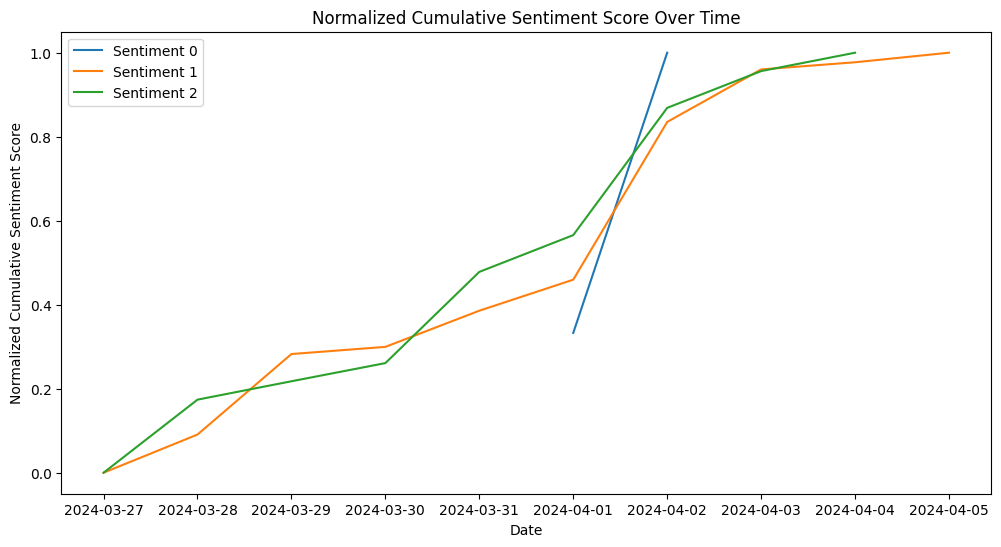

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'date' and 'sentiment_label', then calculate the cumulative sum
grouped = df.groupby(['date', 'sentiment_label'])['sentiment_score'].sum().groupby(level=1).cumsum().reset_index()

# Pivot the table
pivot_df = grouped.pivot(index='date', columns='sentiment_label', values='sentiment_score')

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_scores = scaler.fit_transform(pivot_df)
scaled_scores_df = pd.DataFrame(scaled_scores, columns=pivot_df.columns, index=pivot_df.index)

# Now plot the scaled scores
plt.figure(figsize=(12, 6))
for sentiment_label in scaled_scores_df.columns:
    plt.plot(scaled_scores_df.index, scaled_scores_df[sentiment_label], label=f'Sentiment {sentiment_label}')

plt.xlabel('Date')
plt.ylabel('Normalized Cumulative Sentiment Score')
plt.title('Normalized Cumulative Sentiment Score Over Time')
plt.legend()
plt.show()


### Observations from Normalized Cumulative Sentiment Score Graph

- Initially, there is a **steady rise** in all sentiment labels, suggesting a uniform accumulation of sentiments.
- Sentiment 2 (Positive) experiences **sharp increases**, indicating bursts of strong positive sentiment.
- Towards the end of the timeline, Sentiment 0 (Negative) and Sentiment 2 (Positive) **converge**, implying that positive and negative sentiments are expressed with similar intensity.
- **Fluctuations and shifts** in the sentiment lines suggest varying community sentiment over time.
- The **steady climb** of Sentiment 1 (Neutral) could indicate a consistent level of informational or neutral commentary.

### Insights from Normalized Cumulative Sentiment Score Graph

- The convergence of sentiment lines may indicate **polarized views** within the community, with strong opinions on both sides.
- Dates with significant changes in sentiment lines can pinpoint when key **events or news** influenced public opinion.
- The **normalization of scores** makes it easier to observe relative changes over time, rather than absolute sentiment values.
- Identifying **trends** in sentiment can be useful for correlating public perception with **market movements** or significant **external events**.
- Strategic analysis could leverage these insights to better understand the **impact of sentiment on investment decisions**.


---

### 5. Rate of Change in Sentiment Scores Over Time

- **What it shows**: This analysis focuses on the velocity of sentiment shifts among the comments, capturing a dynamic picture of public opinion over time.
- **Interpretation**: 
    - By calculating the first derivative of cumulative sentiment scores, we identify how rapidly the sentiments are rising or falling.
    - A **rising line** suggests growing sentiment intensity, possibly in reaction to specific news or events.
    - A **declining line** indicates decreasing sentiment intensity, which may occur as a topic becomes less relevant or after the peak of an event.


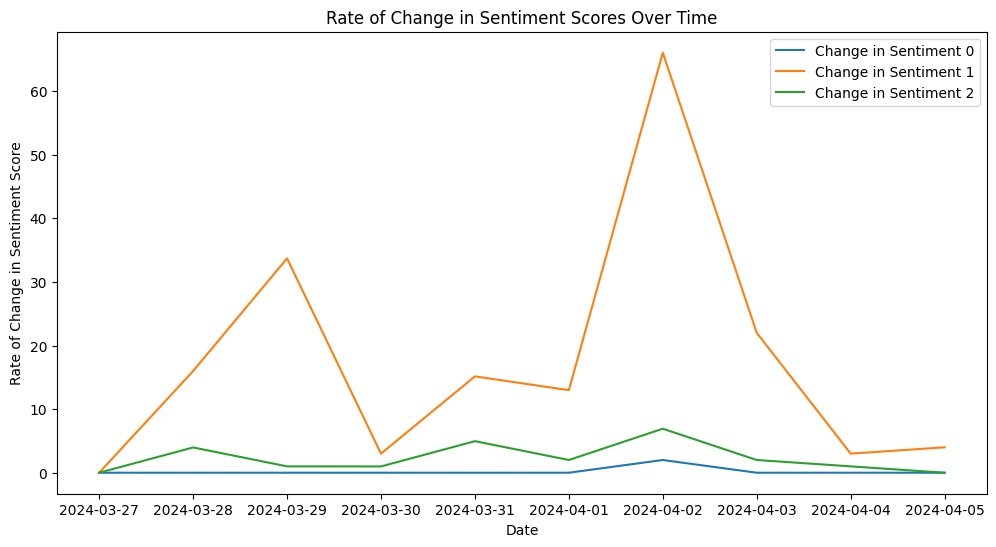

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'date' and 'sentiment_label', then calculate the cumulative sum
grouped = df.groupby(['date', 'sentiment_label'])['sentiment_score'].sum().groupby(level=1).cumsum().reset_index()

# Pivot the table
pivot_df = grouped.pivot(index='date', columns='sentiment_label', values='sentiment_score')

change_in_scores = pivot_df.diff().fillna(0)  # Calculate the change from previous time point

# Plot the rate of change
plt.figure(figsize=(12, 6))
for sentiment_label in change_in_scores.columns:
    plt.plot(change_in_scores.index, change_in_scores[sentiment_label], label=f'Change in Sentiment {sentiment_label}')

plt.xlabel('Date')
plt.ylabel('Rate of Change in Sentiment Score')
plt.title('Rate of Change in Sentiment Scores Over Time')
plt.legend()
plt.show()


### Observations from the Rate of Change in Sentiment Scores Over Time Graph

- **Sentiment 0 (Negative)**: Indicated by the blue line, remains consistently low throughout the period.
- **Sentiment 1 (Neutral)**: Indicated by the orange line, exhibits the most considerable volatility, with sharp increases and decreases.
- **Sentiment 2 (Positive)**: Indicated by the green line, exhibits noticeable volatility with a sharp peak and subsequent drop.

### Insights from the Rate of Change in Sentiment Scores Over Time Graph

- The consistent low level of change in negative sentiment could imply that negative opinions on `VOO` are stable, with no significant events stirring up negativity during the observed period.
- The peak in neutral sentiment might be associated with an occurrence that sparked discussion without necessarily swaying public opinion positively or negatively.
- The volatility in positive sentiment points to specific dates where positive sentiments were strongly influenced, warranting further exploration to understand what caused these shifts.

---

## Analyzing the Overall Sentiment

### 1. Net Sentiment Score (NSS)

The **Normalized Sentiment Score (NSS)** is a statistical method used to quantify the overall sentiment of a dataset. The NSS is derived by subtracting the cumulative sentiment scores of negative comments from those of positive comments for each date. Neutral comments are not included in the NSS calculation as they are considered to have no impact on the overall sentiment polarity. The `MinMaxScaler` from scikit-learn normalizes NSS values to a 0-1 scale, enhancing comparative analysis and visualization by aligning all scores between the observed minimum and maximum.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data = {
    'date': df['date'],
    'sentiment_label': df['sentiment_label'],
    'sentiment_score': df['sentiment_score']
}
nss_df = pd.DataFrame(data)

# Calculate Net Sentiment Score including positive, neutral, and negative sentiments
nss = nss_df.groupby('date').apply(
    lambda x: x[x['sentiment_label'] == 2]['sentiment_score'].sum()  # Sum of positive scores
             - x[x['sentiment_label'] == 0]['sentiment_score'].sum()  # Subtract sum of negative scores
)

# Convert to DataFrame and reset index
nss_df = nss.reset_index()
nss_df.columns = ['date', 'nss']  # Renaming columns

# Normalize the NSS to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
nss_df['normalized_nss'] = scaler.fit_transform(nss_df['nss'].values.reshape(-1, 1))

# Display the DataFrame
nss_df


C:\Users\User\AppData\Local\Temp\ipykernel_11600\4173628570.py:12: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,date,nss,normalized_nss
0,2024-03-27,0.976062,0.407557
1,2024-03-28,3.974690,0.853237
2,2024-03-29,-1.766060,0.000000
3,2024-03-30,0.987844,0.409308
4,2024-03-31,4.962137,1.000000
5,2024-04-01,1.002523,0.411490
6,2024-04-02,4.922970,0.994179
7,2024-04-03,1.999133,0.559614
8,2024-04-04,0.999972,0.411110
9,2024-04-05,0.000000,0.262486


### Merging Sentiment Data with Stock Performance

To analyze the relationship between sentiment and stock performance, we merge the Net Sentiment Score (NSS) data with the historical stock data of VOO (Vanguard S&P 500 ETF). This step allows us to directly compare the dates and sentiment scores with the stock's actual movement.


In [ ]:
voo_df = pd.read_csv('../datasets/VOO_sentiment.csv')
voo_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-03-26,479.059998,479.369995,476.429993,476.600006,476.600006,8073500
1,2024-03-27,479.510010,480.869995,477.450012,480.760010,480.760010,4951400
2,2024-03-28,480.869995,482.160004,480.500000,480.700012,480.700012,4065000
3,2024-04-01,481.440002,481.959991,478.829987,480.070007,480.070007,5734000
4,2024-04-02,476.329987,476.989990,474.709991,476.929993,476.929993,4817800


**Label Definition**: 
- In `voo_df`, the `actual_label` column in `voo_df` indicates the actual stock movement
- The `actual_label` is defined where `1` indicates a rise in stock price and `0` indicates a decline. 
- `NaN` values represent non-trading days, reflecting days without stock price movement.

In [ ]:
voo_df['actual_label'] = (voo_df['Close'] > voo_df['Open']).astype(int)

voo_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,actual_label
0,2024-03-26,479.059998,479.369995,476.429993,476.600006,476.600006,8073500,0
1,2024-03-27,479.510010,480.869995,477.450012,480.760010,480.760010,4951400,1
2,2024-03-28,480.869995,482.160004,480.500000,480.700012,480.700012,4065000,0
3,2024-04-01,481.440002,481.959991,478.829987,480.070007,480.070007,5734000,0
4,2024-04-02,476.329987,476.989990,474.709991,476.929993,476.929993,4817800,1


In [ ]:
nss_df['date'] = pd.to_datetime(nss_df['date'])
voo_df['Date'] = pd.to_datetime(voo_df['Date'])

voo_df['actual_label'] = voo_df['actual_label']

# Data merging on nss_df with voo_df
nss_df = pd.merge(nss_df, voo_df, how='left', left_on='date', right_on='Date')

# Cleanup unnecessary columns
nss_df.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1, inplace=True)

nss_df

,date,nss,normalized_nss,actual_label
0,2024-03-27,0.976062,0.407557,1.0
1,2024-03-28,3.974690,0.853237,0.0
2,2024-03-29,-1.766060,0.000000,NaN
3,2024-03-30,0.987844,0.409308,NaN
4,2024-03-31,4.962137,1.000000,NaN
5,2024-04-01,1.002523,0.411490,0.0
6,2024-04-02,4.922970,0.994179,1.0
7,2024-04-03,1.999133,0.559614,1.0
8,2024-04-04,0.999972,0.411110,0.0
9,2024-04-05,0.000000,0.262486,1.0


The resulting data frame, `nss_df`, now contains the dates, NSS, normalized NSS, and actual stock labels, setting the stage for detailed analysis of sentiment influence on stock behavior.

---

### Visualizing NSS with Stock Movements

The visualizations depict the relationship between normalized net sentiment scores (NSS) and stock movements on specific dates.

#### Matplotlib Visualization
This visualization plots the normalized NSS over time. Depending on the stock's actual performance on a particular day, different markers are overlaid:
- Green upward triangles represent days when the stock price went up (`actual_label` == 1).
- Red downward triangles indicate days when the stock price went down (`actual_label` == 0).
- Grey circles mark days when the market was closed (`actual_label` else).


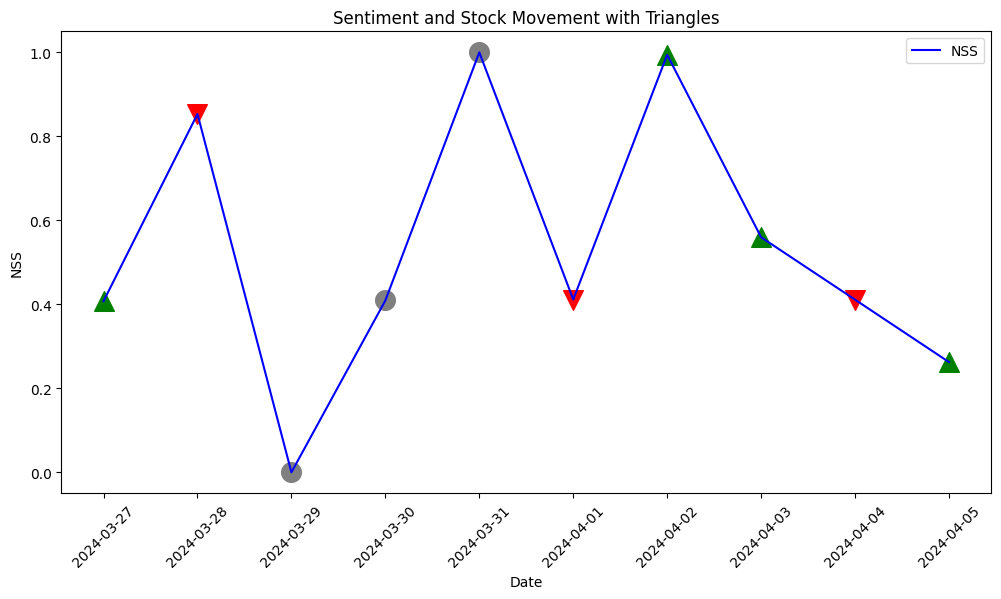

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(nss_df['date'], nss_df['normalized_nss'], label='NSS', color='blue')

for i, row in nss_df.iterrows():
    if row['actual_label'] == 1:
        plt.scatter(row['date'], row['normalized_nss'], color='green', marker='^', s=200)
    elif row['actual_label'] == 0:
        plt.scatter(row['date'], row['normalized_nss'], color='red', marker='v', s=200)
    else:
        plt.scatter(row['date'], row['normalized_nss'], color='grey', marker='o', s=200)

plt.xlabel('Date')
plt.ylabel('NSS')
plt.title('Sentiment and Stock Movement with Triangles')
plt.xticks(rotation=45)
plt.legend()
plt.show()

#### Plotly Visualization
This visualization offers an interactive graph of the same data. This graph enhances the user experience by allowing for dynamic interaction, such as hovering to reveal exact values, zooming, and panning. Similar to the Matplotlib graph, it uses markers (triangles and circles) to indicate daily stock performance.

This interactive graph provides a more engaging way to explore the data, making it easier to pinpoint and analyze specific dates or trends in sentiment relative to stock price movements.

In [ ]:
import plotly.graph_objects as go

# Creating the line plot for weighted average sentiment
fig = go.Figure()
fig.add_trace(go.Scatter(x=nss_df['date'], y=nss_df['normalized_nss'], mode='lines', name='NSS Sentiment', line=dict(color='blue')))

# Adding markers for actual stock labels
for i, row in nss_df.iterrows():
    if row['actual_label'] == 1:
        fig.add_trace(go.Scatter(x=[row['date']], y=[row['normalized_nss']], mode='markers', marker_symbol='triangle-up', marker_color='green', marker_size=10, name='Stock Up'))
    elif row['actual_label'] == 0:
        fig.add_trace(go.Scatter(x=[row['date']], y=[row['normalized_nss']], mode='markers', marker_symbol='triangle-down', marker_color='red', marker_size=10, name='Stock Down'))
    else:
        fig.add_trace(go.Scatter(x=[row['date']], y=[row['normalized_nss']], mode='markers', marker_symbol='circle', marker_color='grey', marker_size=10, name='Market Closed'))

# Setting layout for the figure
fig.update_layout(title='Sentiment and Stock Movement with Interactive Triangles', xaxis_title='Date', yaxis_title='NSS Sentiment', legend_title='Legend')
fig.show()

### Observations from NSS Sentiment and Stock Movement with Triangles Graph

- There are instances where the peaks and troughs in sentiment correspond with stock movement indicators, suggesting a possible correlation between public sentiment and stock price changes.
- Notably, on 2024-04-02, a peak in NSS is followed by a green triangle, suggesting a rise in stock price the next trading day. Similarly, on 2024-04-01, a sharp dip in NSS is followed by a red triangle, indicating a subsequent drop in stock price.
- Days such as 2024-03-28, where the NSS is relatively high without an upward green triangle, and 2024-04-03, where the NSS is low without a downward red triangle, highlight instances where sentiment does not align perfectly with stock movements.

### Insights Gained

- Instances like on 2024-04-01 and 2024-04-02, where sentiment peaks or dips align with green or red triangles respectively, could imply that extreme public sentiment may be a predictive factor for stock price changes.
- The lack of consistent alignment between sentiment scores and stock movements, such as on 2024-03-28 and 2024-04-03, suggests that while sentiment can influence stock prices, it is not the sole factor affecting market movements.
- The timing and alignment of sentiment scores with stock movement triangles may provide a visual aid in assessing sentiment as a potential leading indicator for stock price changes.


---

### Correlation Analysis Between NSS and Stock Daily Return

To investigate the statistical relationship between the net sentiment scores (NSS) and the daily return of VOO (Vanguard S&P 500 ETF), we utilize the Pearson correlation coefficient. This measure will help us understand the linear correlation between these two variables:

- **Pearson Correlation Coefficient**: This statistic measures the linear correlation between two variables, yielding a value between -1 and 1. A value close to 1 implies a strong positive correlation, meaning as the NSS increases, so does the stock's daily return. Conversely, a value close to -1 indicates a strong negative correlation, where an increase in NSS corresponds to a decrease in daily returns. A value near 0 suggests no linear correlation.


In [ ]:
voo_df = pd.read_csv('../datasets/VOO_sentiment.csv')
voo_df['daily_return'] = (voo_df['Close'] - voo_df['Open']) / voo_df['Open']

voo_df

,Date,Open,High,Low,Close,Adj Close,Volume,daily_return
0,2024-03-26,479.059998,479.369995,476.429993,476.600006,476.600006,8073500,-0.005135
1,2024-03-27,479.510010,480.869995,477.450012,480.760010,480.760010,4951400,0.002607
2,2024-03-28,480.869995,482.160004,480.500000,480.700012,480.700012,4065000,-0.000353
3,2024-04-01,481.440002,481.959991,478.829987,480.070007,480.070007,5734000,-0.002846
4,2024-04-02,476.329987,476.989990,474.709991,476.929993,476.929993,4817800,0.001260
5,2024-04-03,475.839996,478.799988,475.790009,477.359985,477.359985,6218200,0.003194
6,2024-04-04,481.200012,481.480011,471.269989,471.480011,471.480011,6871200,-0.020200
7,2024-04-05,472.850006,478.329987,472.420013,476.489990,476.489990,5582200,0.007698


In [ ]:
voo_df['Date'] = pd.to_datetime(voo_df['Date'])
nss_df['date'] = pd.to_datetime(nss_df['date'])

nss_df = pd.merge(nss_df, voo_df, how='left', left_on='date', right_on='Date')
nss_df.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1, inplace=True)

nss_df

,date,nss,normalized_nss,actual_label,daily_return
0,2024-03-27,0.976062,0.407557,1.0,0.002607
1,2024-03-28,3.974690,0.853237,0.0,-0.000353
2,2024-03-29,-1.766060,0.000000,NaN,NaN
3,2024-03-30,0.987844,0.409308,NaN,NaN
4,2024-03-31,4.962137,1.000000,NaN,NaN
5,2024-04-01,1.002523,0.411490,0.0,-0.002846
6,2024-04-02,4.922970,0.994179,1.0,0.001260
7,2024-04-03,1.999133,0.559614,1.0,0.003194
8,2024-04-04,0.999972,0.411110,0.0,-0.020200
9,2024-04-05,0.000000,0.262486,1.0,0.007698


In [ ]:
# Calculate correlation for NSS
correlation_nss = nss_df['normalized_nss'].corr(nss_df['daily_return'], method='pearson')
print("Pearson Correlation Coefficient (NSS):", correlation_nss)

Pearson Correlation Coefficient (NSS): 0.08037483783211673


### Conclusion from Pearson Correlation Analysis

- The Pearson correlation coefficient between the NSS and the daily return of the VOO stock indicates a very weak positive linear correlation between these two variables. 
- The result suggests that while there is a slight positive relationship, NSS has minimal predictive power regarding the daily price movements of VOO stock. 
- The low correlation coefficient implies that changes in the sentiment captured through NSS are unlikely to significantly impact or predict changes in VOO's daily stock returns. 
- Further analysis might explore other factors or use different analytical approaches to better understand the dynamics between market sentiment and stock movements.


---

### Dual Y-Axis Time-Series Plot for Normalized NSS and Daily Stock Returns

This visualization shows the relationship between daily stock returns and normalized net sentiment scores (NSS) over time.

**Left Y-Axis (NSS)**: Displays the normalized NSS, allowing us to track sentiment trends over time in relation to stock movements. This axis helps to understand the sentiment's intensity and variation through normalized values ranging from 0 to 1.
  
**Right Y-Axis (Daily Returns)**: Shows the daily stock returns, providing a direct comparison of financial performance against public sentiment. This axis is crucial for observing how stock prices react on days with varying sentiment scores.

#### Key Features:
- **Correlation Analysis**: By plotting these two metrics together, the graph facilitates a visual correlation analysis, making it easier to identify whether shifts in public sentiment have a noticeable impact on stock returns.
  
- **Investment Insights**: Investors can use this chart to gauge sentiment-driven volatility or stability in stock prices, potentially guiding investment decisions based on sentiment trends.


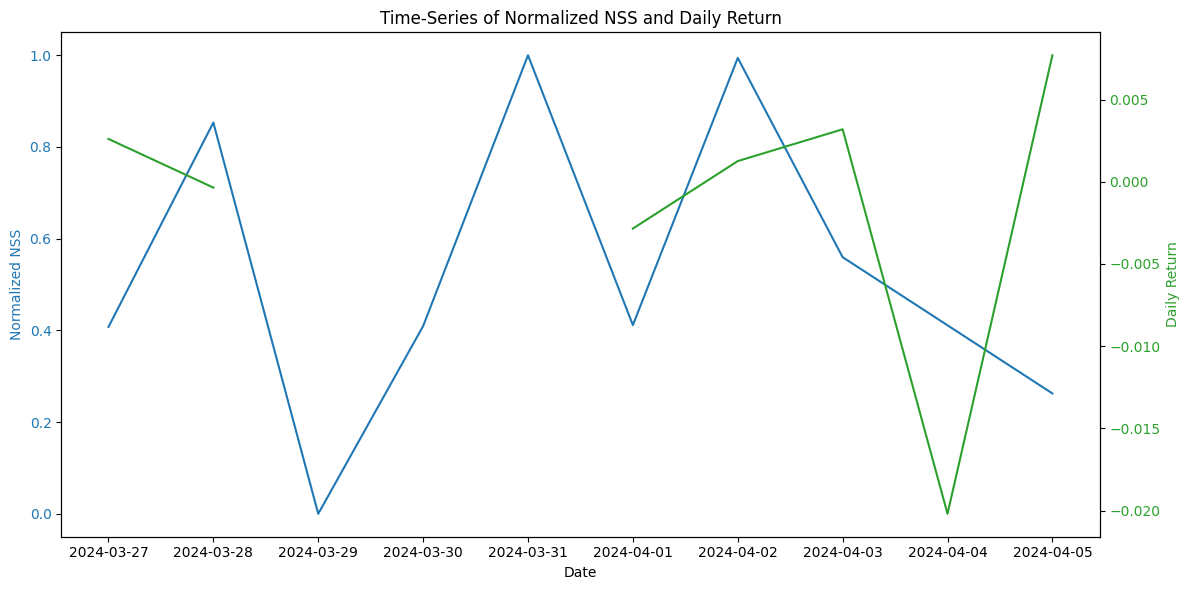

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# First axis (ax1) for NSS
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized NSS', color=color)
ax1.plot(nss_df['date'], nss_df['normalized_nss'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis (ax2) for Daily Return
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Daily Return', color=color)
ax2.plot(nss_df['date'], nss_df['daily_return'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and show plot
plt.title('Time-Series of Normalized NSS and Daily Return')
fig.tight_layout()  # otherwise the right y-label may be slightly clipped
plt.show()


### Observations from Dual Y-Axis Time-Series Plot

- The **Normalized Net Sentiment Score (NSS)** and **daily stock returns** exhibit fluctuations that do not always align, suggesting that sentiment may not immediately impact stock returns.
- On certain dates, increases in sentiment precede stock returns rise, while on others, they follow the rise. However, this is not a consistent trend throughout the observed timeframe.
- The peak in sentiment score does not always match the peak in daily returns, implying that sentiment is not the only driving factor in stock performance.

### Insights Gained

- Sentiment likely influences stock prices among a broader mix of factors; thus, it should not be used in isolation to predict market movements.
- Delayed correlations between sentiment and stock returns hint at sentiment potentially being a leading indicator, but establishing a definitive causal relationship would require further in-depth analysis.
- For a comprehensive investment strategy, sentiment analysis should be integrated with other analytical methods, including fundamental and technical analysis, to make more robust investment decisions.


---

### 2. Weighted Average

The weighted average sentiment score is a metric that provides a composite measure of the overall sentiment for a given period by considering both the sentiment labels and their corresponding scores. It's calculated by multiplying each comment's sentiment label with its score, summing these products, and then dividing by the total sum of sentiment scores. 

This method weights the sentiment labels according to their confidence scores, ensuring that sentiments in which the model has higher confidence have a more significant impact on the average. It is particularly useful when sentiment scores vary widely in confidence, allowing for a more nuanced view of the overall sentiment than a simple average might provide.

In [ ]:
import pandas as pd

data = {
    'date': df['date'],
    'sentiment_label': df['sentiment_label'],
    'sentiment_score': df['sentiment_score']
}
weighted_avg_df = pd.DataFrame(data)

# Calculate Weighted Average Sentiment
weighted_avg = weighted_avg_df.groupby('date').apply(
    lambda x: (x['sentiment_label'] * x['sentiment_score']).sum() / x['sentiment_score'].sum())

# Convert to DataFrame and reset index
weighted_avg_df = weighted_avg.reset_index()
weighted_avg_df.columns = ['date', 'weighted_average']  # Renaming columns

weighted_avg_df


C:\Users\User\AppData\Local\Temp\ipykernel_11600\3680299673.py:11: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,date,weighted_average
0,2024-03-27,1.245679
1,2024-03-28,1.199104
2,2024-03-29,0.952866
3,2024-03-30,1.247756
4,2024-03-31,1.246772
5,2024-04-01,1.062737
6,2024-04-02,1.065669
7,2024-04-03,1.083322
8,2024-04-04,1.250019
9,2024-04-05,1.000000


### Merging Sentiment Data with Stock Performance

In [ ]:
voo_df = pd.read_csv('../datasets/VOO_sentiment.csv')
voo_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-03-26,479.059998,479.369995,476.429993,476.600006,476.600006,8073500
1,2024-03-27,479.510010,480.869995,477.450012,480.760010,480.760010,4951400
2,2024-03-28,480.869995,482.160004,480.500000,480.700012,480.700012,4065000
3,2024-04-01,481.440002,481.959991,478.829987,480.070007,480.070007,5734000
4,2024-04-02,476.329987,476.989990,474.709991,476.929993,476.929993,4817800
5,2024-04-03,475.839996,478.799988,475.790009,477.359985,477.359985,6218200
6,2024-04-04,481.200012,481.480011,471.269989,471.480011,471.480011,6871200
7,2024-04-05,472.850006,478.329987,472.420013,476.489990,476.489990,5582200


In [ ]:
voo_df['actual_label'] = (voo_df['Close'] > voo_df['Open']).astype(int)

voo_df

,Date,Open,High,Low,Close,Adj Close,Volume,actual_label
0,2024-03-26,479.059998,479.369995,476.429993,476.600006,476.600006,8073500,0
1,2024-03-27,479.510010,480.869995,477.450012,480.760010,480.760010,4951400,1
2,2024-03-28,480.869995,482.160004,480.500000,480.700012,480.700012,4065000,0
3,2024-04-01,481.440002,481.959991,478.829987,480.070007,480.070007,5734000,0
4,2024-04-02,476.329987,476.989990,474.709991,476.929993,476.929993,4817800,1
5,2024-04-03,475.839996,478.799988,475.790009,477.359985,477.359985,6218200,1
6,2024-04-04,481.200012,481.480011,471.269989,471.480011,471.480011,6871200,0
7,2024-04-05,472.850006,478.329987,472.420013,476.489990,476.489990,5582200,1


In [ ]:
weighted_avg_df['date'] = pd.to_datetime(weighted_avg_df['date'])
voo_df['Date'] = pd.to_datetime(voo_df['Date'])

weighted_avg_df = pd.merge(weighted_avg_df, voo_df, how='left', left_on='date', right_on='Date')

weighted_avg_df.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1, inplace=True)

weighted_avg_df

,date,weighted_average,actual_label
0,2024-03-27,1.245679,1.0
1,2024-03-28,1.199104,0.0
2,2024-03-29,0.952866,NaN
3,2024-03-30,1.247756,NaN
4,2024-03-31,1.246772,NaN
5,2024-04-01,1.062737,0.0
6,2024-04-02,1.065669,1.0
7,2024-04-03,1.083322,1.0
8,2024-04-04,1.250019,0.0
9,2024-04-05,1.000000,1.0


The resulting data frame, `weighted_avg_df`, now contains the dates, weighted average, and actual stock labels, setting the stage for detailed analysis of sentiment influence on stock behavior.

---

### Visualizing Weighted Average Sentiment with Stock Movements

The visualizations depict the relationship between weighted average and stock movements on specific dates.

#### Matplotlib Visualization

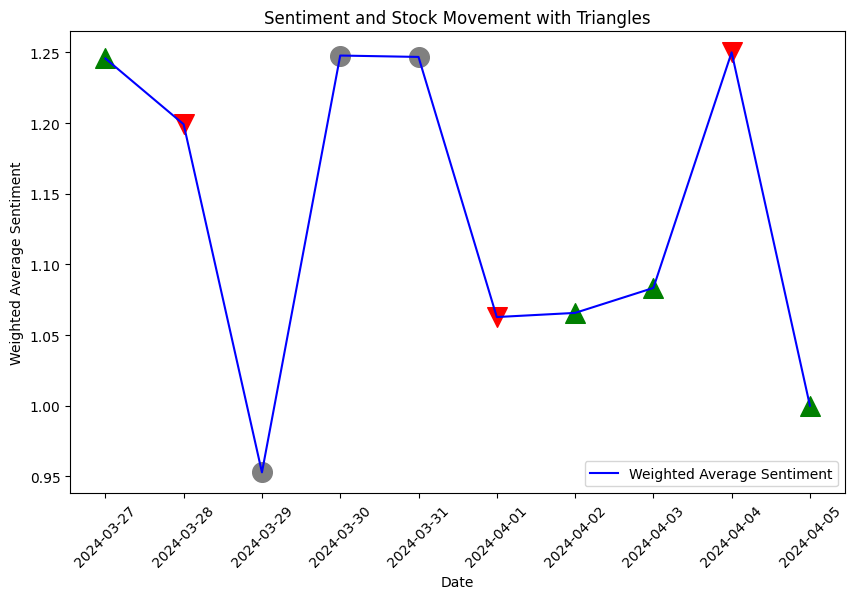

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(weighted_avg_df['date'], weighted_avg_df['weighted_average'], label='Weighted Average Sentiment', color='blue')

for i, row in weighted_avg_df.iterrows():
    if row['actual_label'] == 1:
        plt.scatter(row['date'], row['weighted_average'], color='green', marker='^', s=200)
    elif row['actual_label'] == 0:
        plt.scatter(row['date'], row['weighted_average'], color='red', marker='v', s=200)
    else:
        plt.scatter(row['date'], row['weighted_average'], color='grey', marker='o', s=200)

plt.xlabel('Date')
plt.ylabel('Weighted Average Sentiment')
plt.title('Sentiment and Stock Movement with Triangles')
plt.xticks(rotation=45)
plt.legend()
plt.show()


#### Plotly Visualization

In [ ]:
import plotly.graph_objects as go

# Creating the line plot for weighted average sentiment
fig = go.Figure()
fig.add_trace(go.Scatter(x=weighted_avg_df['date'], y=weighted_avg_df['weighted_average'], mode='lines', name='Weighted Average Sentiment', line=dict(color='blue')))

# Adding markers for actual stock labels
for i, row in weighted_avg_df.iterrows():
    if row['actual_label'] == 1:
        fig.add_trace(go.Scatter(x=[row['date']], y=[row['weighted_average']], mode='markers', marker_symbol='triangle-up', marker_color='green', marker_size=10, name='Stock Up'))
    elif row['actual_label'] == 0:
        fig.add_trace(go.Scatter(x=[row['date']], y=[row['weighted_average']], mode='markers', marker_symbol='triangle-down', marker_color='red', marker_size=10, name='Stock Down'))
    else:
        fig.add_trace(go.Scatter(x=[row['date']], y=[row['weighted_average']], mode='markers', marker_symbol='circle', marker_color='grey', marker_size=10, name='Market Closed'))

# Setting layout for the figure
fig.update_layout(title='Sentiment and Stock Movement with Interactive Triangles', xaxis_title='Date', yaxis_title='Weighted Average Sentiment', legend_title='Legend')
fig.show()


### Observations from Weighted Average Sentiment and Stock Movement with Triangles Graph

- On 2024-03-28, a relatively small decrease in weighted average sentiment is closely followed by a red triangle, potentially indicating a fall in stock prices shortly after a decline in sentiment.
- Also, on 2024-04-01, a sharp decline in sentiment is observed which aligns with a red triangle, suggesting a decrease in stock price following a dip in sentiment.
- There are also instances where the triangles and sentiment trend do not align. For example, on 2024-04-05, despite a sharp decline in sentiment score, a green triangle is observed, implying that stock prices went up even though the sentiment was strongly negative.
- Similarly, on 2024-04-04, despite a high sentiment score, a red triangle is observed, which might indicate a situation where positive sentiment did not translate into a rising stock price.

### Insights Gained

- Insights drawn from such a graph could suggest that while there is some correlation between sentiment and stock movement, it is not always perfectly aligned. 
- External factors and market dynamics could also play a role, and sentiment might have a delayed effect on stock prices. 


---

### Correlation between Stock Daily Returns and Weighted Average

In [ ]:
voo_df = pd.read_csv('../datasets/VOO_sentiment.csv')
voo_df['daily_return'] = (voo_df['Close'] - voo_df['Open']) / voo_df['Open']

voo_df

,Date,Open,High,Low,Close,Adj Close,Volume,daily_return
0,2024-03-26,479.059998,479.369995,476.429993,476.600006,476.600006,8073500,-0.005135
1,2024-03-27,479.510010,480.869995,477.450012,480.760010,480.760010,4951400,0.002607
2,2024-03-28,480.869995,482.160004,480.500000,480.700012,480.700012,4065000,-0.000353
3,2024-04-01,481.440002,481.959991,478.829987,480.070007,480.070007,5734000,-0.002846
4,2024-04-02,476.329987,476.989990,474.709991,476.929993,476.929993,4817800,0.001260
5,2024-04-03,475.839996,478.799988,475.790009,477.359985,477.359985,6218200,0.003194
6,2024-04-04,481.200012,481.480011,471.269989,471.480011,471.480011,6871200,-0.020200
7,2024-04-05,472.850006,478.329987,472.420013,476.489990,476.489990,5582200,0.007698


In [ ]:
voo_df['Date'] = pd.to_datetime(voo_df['Date'])
weighted_avg_df['date'] = pd.to_datetime(weighted_avg_df['date'])

weighted_avg_df = pd.merge(weighted_avg_df, voo_df, how='left', left_on='date', right_on='Date')
weighted_avg_df.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1, inplace=True)

weighted_avg_df

,date,weighted_average,actual_label,daily_return
0,2024-03-27,1.245679,1.0,0.002607
1,2024-03-28,1.199104,0.0,-0.000353
2,2024-03-29,0.952866,NaN,NaN
3,2024-03-30,1.247756,NaN,NaN
4,2024-03-31,1.246772,NaN,NaN
5,2024-04-01,1.062737,0.0,-0.002846
6,2024-04-02,1.065669,1.0,0.001260
7,2024-04-03,1.083322,1.0,0.003194
8,2024-04-04,1.250019,0.0,-0.020200
9,2024-04-05,1.000000,1.0,0.007698


In [ ]:
# Calculate correlation for Weighted Average
correlation_weighted_avg = weighted_avg_df['weighted_average'].corr(weighted_avg_df['daily_return'], method='pearson')
print("Pearson Correlation Coefficient (Weighted Average):", correlation_weighted_avg)

Pearson Correlation Coefficient (Weighted Average): -0.591005375027933


### Conclusion from Pearson Correlation Analysis

- This suggests that there is a moderate negative correlation between the weighted average sentiment and the stock's daily return. 
- This could indicate that as the weighted average sentiment becomes more positive, the stock's daily return tends to decrease, and vice versa. 
- However, it's important to remember that correlation does not imply causation. 
- This statistic only suggests a relationship, not that one variable causes the other to change. 
- Moreover, other factors could be influencing stock returns, and sentiment is just one aspect of the complex dynamics of financial markets.

---

### Dual Y-Axis Time-Series Plot for Weighted Average and Daily Stock Returns

**Left y-axis (Weighted Average)**: Represents the weighted average sentiment scores over time, which provides insight into the general sentiment trend in the context of stock-related discussions. The line graph associated with this axis will fluctuate according to the strength and polarity of sentiment on each date.

**Right y-axis (Daily Returns)**:  Corresponds to the daily stock returns, enabling us to observe the stock's financial performance as it relates to price changes from day to day. The line graph on this axis shows the percentage change in stock price, allowing for a visual correlation between sentiment trends and stock performance.

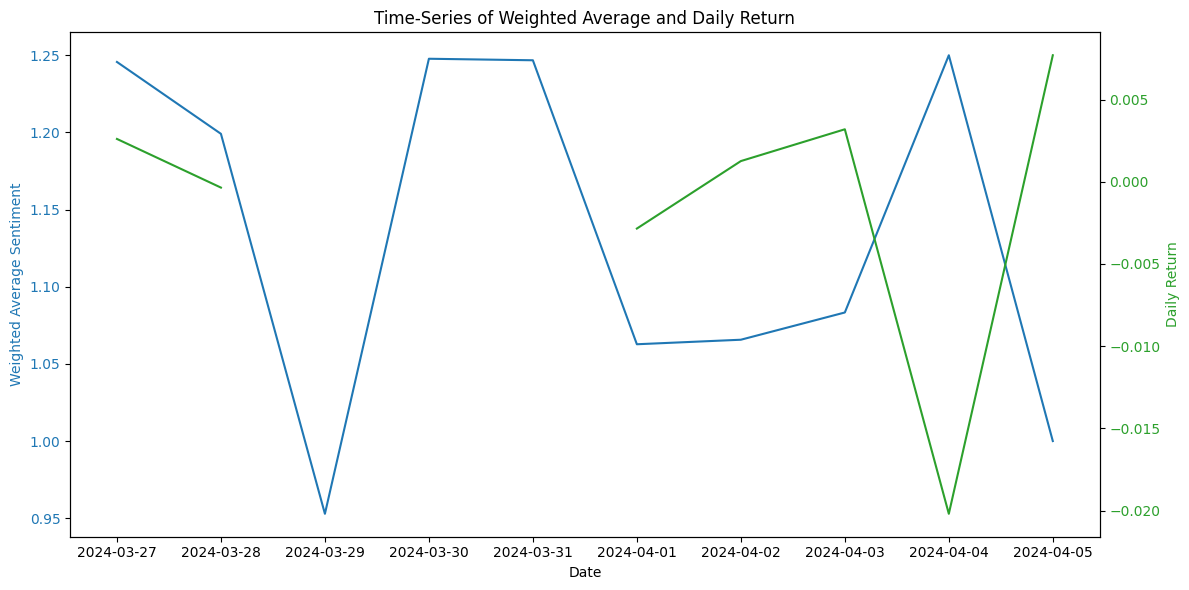

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# First axis (ax1) for Weighted Average
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Weighted Average Sentiment', color=color)
ax1.plot(nss_df['date'], weighted_avg_df['weighted_average'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis (ax2) for Daily Return
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Daily Return', color=color)
ax2.plot(nss_df['date'], weighted_avg_df['daily_return'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and show plot
plt.title('Time-Series of Weighted Average and Daily Return')
fig.tight_layout()  # otherwise the right y-label may be slightly clipped
plt.show()


### Observations and Insights from Time-Series of Weighted Average and Daily Return

The time-series graph juxtaposes the trend of the weighted average sentiment against the daily stock returns, providing an opportunity to observe any correlations between market sentiment and stock performance.

#### Observations:
- The weighted average sentiment fluctuates over time, suggesting shifts in the collective mood or opinion towards the stock.
- Daily returns also vary, reflecting the natural volatility in the stock market.
- There are points where a peak or trough in sentiment seems to precede a corresponding movement in daily returns, which may imply a potential lead-lag relationship.
- For example, on `2024-04-03`, a noticeable increase in the weighted average sentiment precedes a rise in stock returns on `2024-04-05`

#### Insights:
- Instances where changes in sentiment precede stock movements might indicate that sentiment can serve as an early indicator for stock price direction.
- It's essential to cross-reference such patterns with external events, such as news releases or market changes, to understand the broader context affecting stock prices.

Overall, while some alignment can be observed, the relationship between sentiment and stock returns may not always be direct or causal. External market forces, news events, and other variables likely play significant roles in stock performance and should be considered when interpreting these results.
